# Name: Himanshu Bisht

# Task 5: To Explore Business Analytics

## Aim - To perform 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'.
### Problem Statement - You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [47]:
# Importing the required libraries that will help us to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and observing the nature of the dataset

In [48]:
dataset = pd.read_csv("SampleSuperstore.csv")

In [49]:
dataset.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [50]:
dataset.shape

(9994, 13)

# There are 13 features present here

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [52]:
# Checking for duplicate rows
dataset.duplicated().sum()

17

In [53]:
# Removing duplicated rows
dataset.drop_duplicates(inplace=True)

In [55]:
dataset.shape

(9977, 13)

# Visualization using sns heatmap

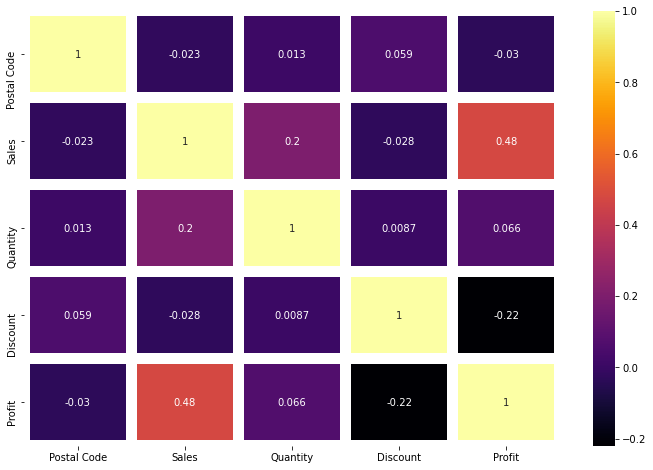

In [56]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(method='pearson'), annot=True, cmap="inferno", lw=10, linecolor='white')

# Observing the features now in much more detail

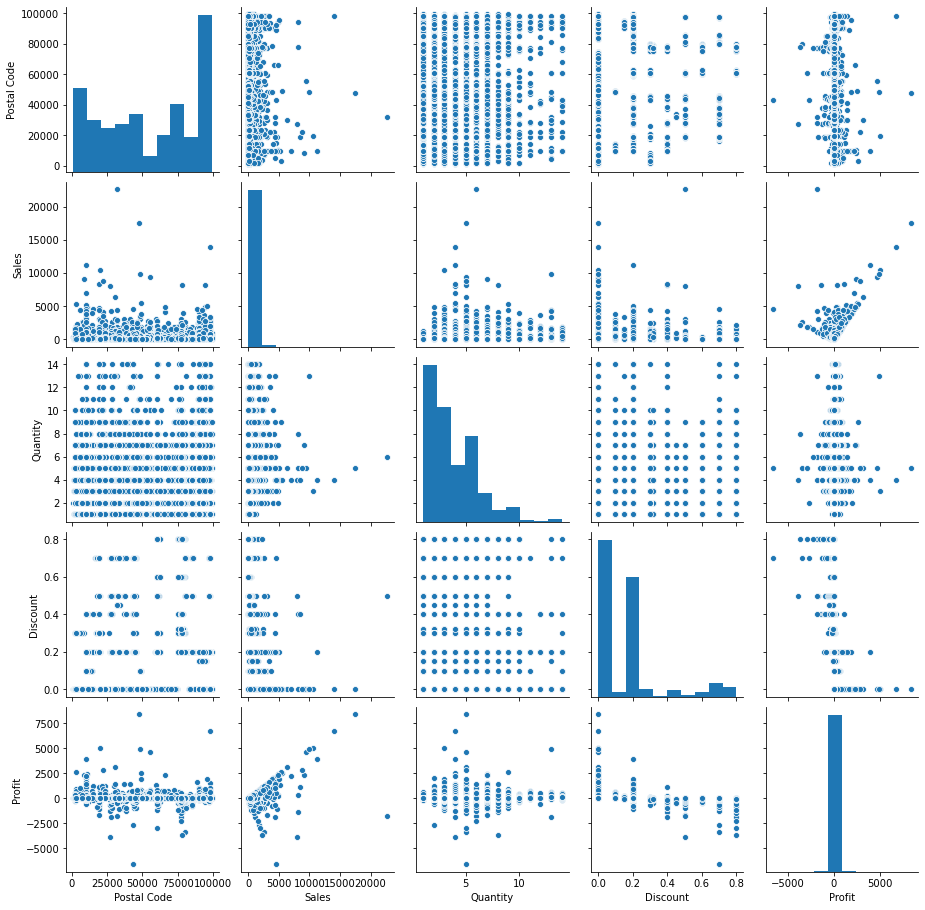

In [57]:
sns.pairplot(dataset)

# The outliers will be clearly detected by a seaborn box-plot

In [61]:
ds = dataset.select_dtypes(include=[np.number])

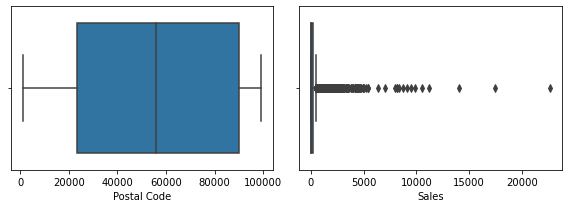

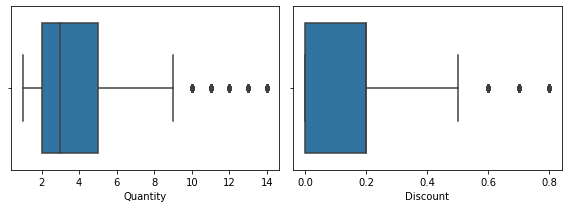

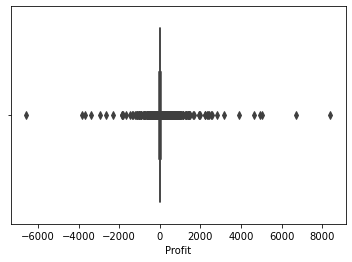

In [62]:
# Taking a list of all the features/columns
cols = ds.columns.tolist()

# Box plot of all the features to detect outliers
for col in range(0, len(cols), 2):
    if len(cols) > col + 1:
        plt.figure(figsize=(8,3))
        plt.subplot(121)
        sns.boxplot(ds[cols[col]])
        plt.subplot(122)
        sns.boxplot(ds[cols[col + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[col]])

# The SNS plot clearly reveals the outliers in the dataset. Since the dataset is huge, their removal will not affect final results that much.

In [63]:
# Removing outliers now
from scipy.stats.mstats import winsorize # this library helps us in this process

# Treating outliers by Winssorization
cols = list(ds)
for col in cols:
    if col in ds.select_dtypes(include=np.number).columns:
        ds[col] = winsorize(ds[col], limits=[0.05,0.1], inclusive=(True,True))

ds.shape

<ipython-input-63-f9491d34bb35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[col] = winsorize(ds[col], limits=[0.05,0.1], inclusive=(True,True))


(9977, 5)

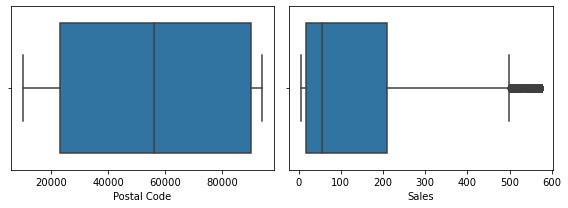

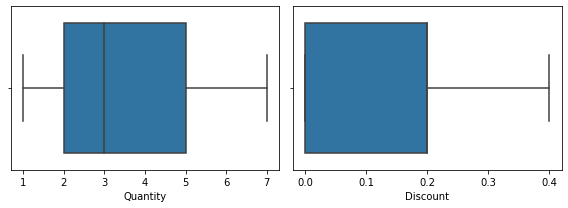

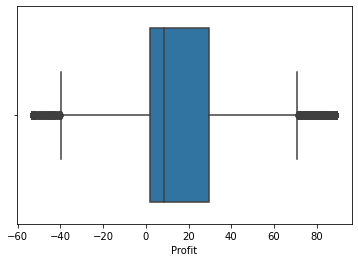

In [64]:
#Boxplot of all features to identify outliners
for col in range(0, len(cols), 2):
    if len(cols) > col + 1:
        plt.figure(figsize=(8,3))
        plt.subplot(121)
        sns.boxplot(ds[cols[col]])
        plt.subplot(122)
        sns.boxplot(ds[cols[col + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[col]])

# The Winsorise model treats outliers extremely well. We can now safely do EDA (Exploratory Data Analysis)

# Next step, visualization of our data

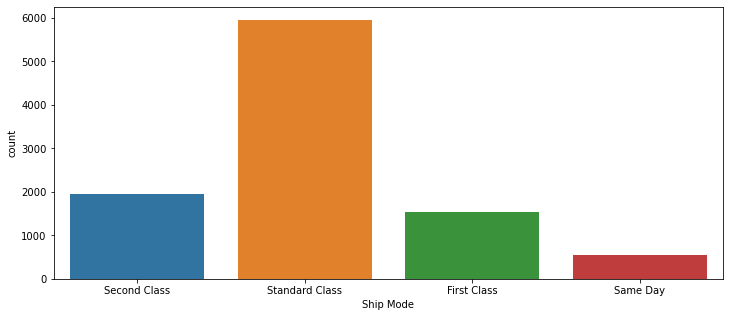

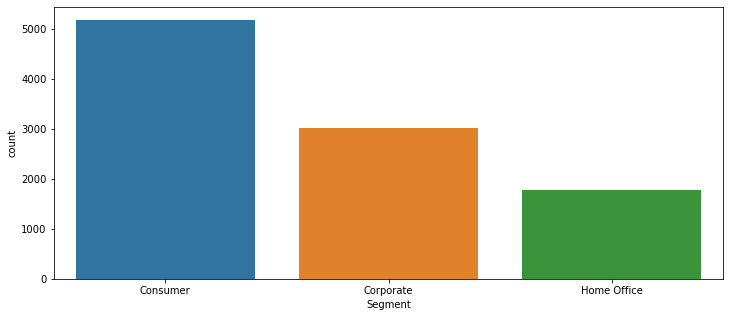

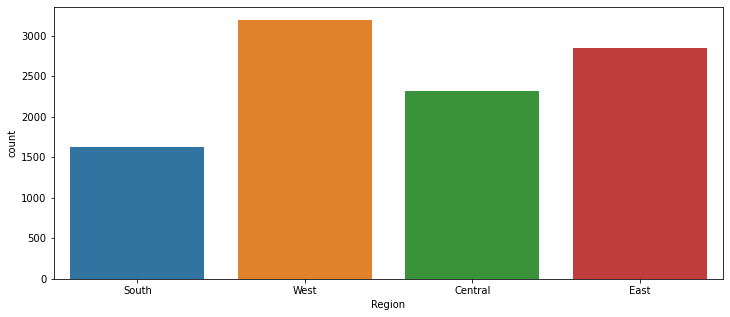

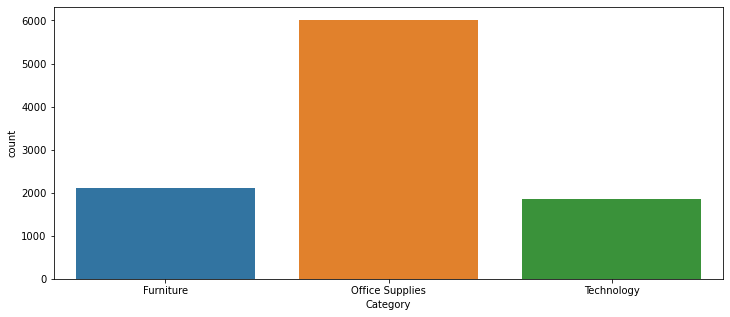

In [65]:
for i in dataset[['Ship Mode', 'Segment', 'Region', 'Category']]:
    plt.figure(figsize=(12,5))
    sns.countplot(dataset[i])
    plt.show()

# Observations 

### In the Ship mode, the Standard Class has the highest count which means the customers give the highest priority to this type of shipping mode.

### In Segment, the Consumers have the highest count which means that the consumers use most of the shippings.

### From the Regions graph, West Region has the highest count

### From the items category, Office Supplies has the highest count

Text(0, 0.5, 'Frequency')

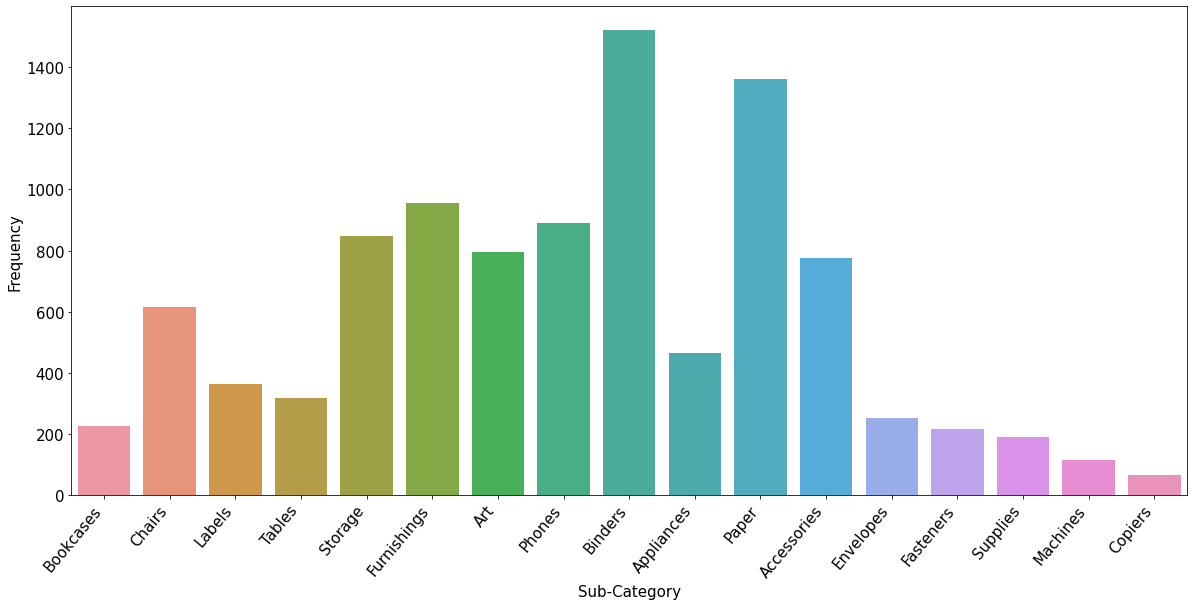

In [66]:
plt.figure(figsize = (20,9))
sns.countplot(dataset['Sub-Category'])
plt.xticks(rotation=50, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# From the above graph, we can see that Binders, Paper, Furnishings and Phones have the highest frequency, which means they are popular

Text(0.5, 6.79999999999999, 'Products')

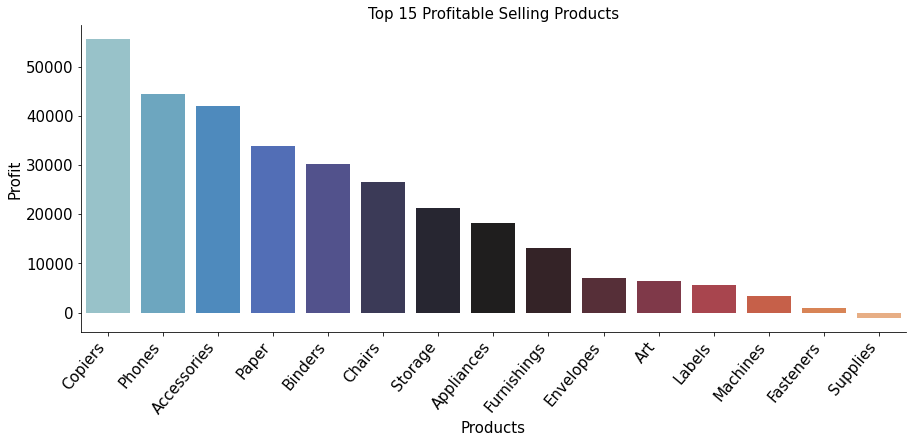

In [67]:
#Top 15 Profittable selling products
top_15 = dataset.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
sns.catplot(x = 'Sub-Category', y = 'Profit', data = top_15.head(15), kind = 'bar', aspect = 2.5, palette = 'icefire')
plt.title('Top 15 Profitable Selling Products', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xlabel('Products', fontsize = 15)

# From the above graph, we can observe the following things:

# 1. Copiers, Phones and Accessories are sold alot.

# 2. Copiers gain higher profits despite having least count.

# 3. Machines have the lower count as well as profits, hence it is of least value. 


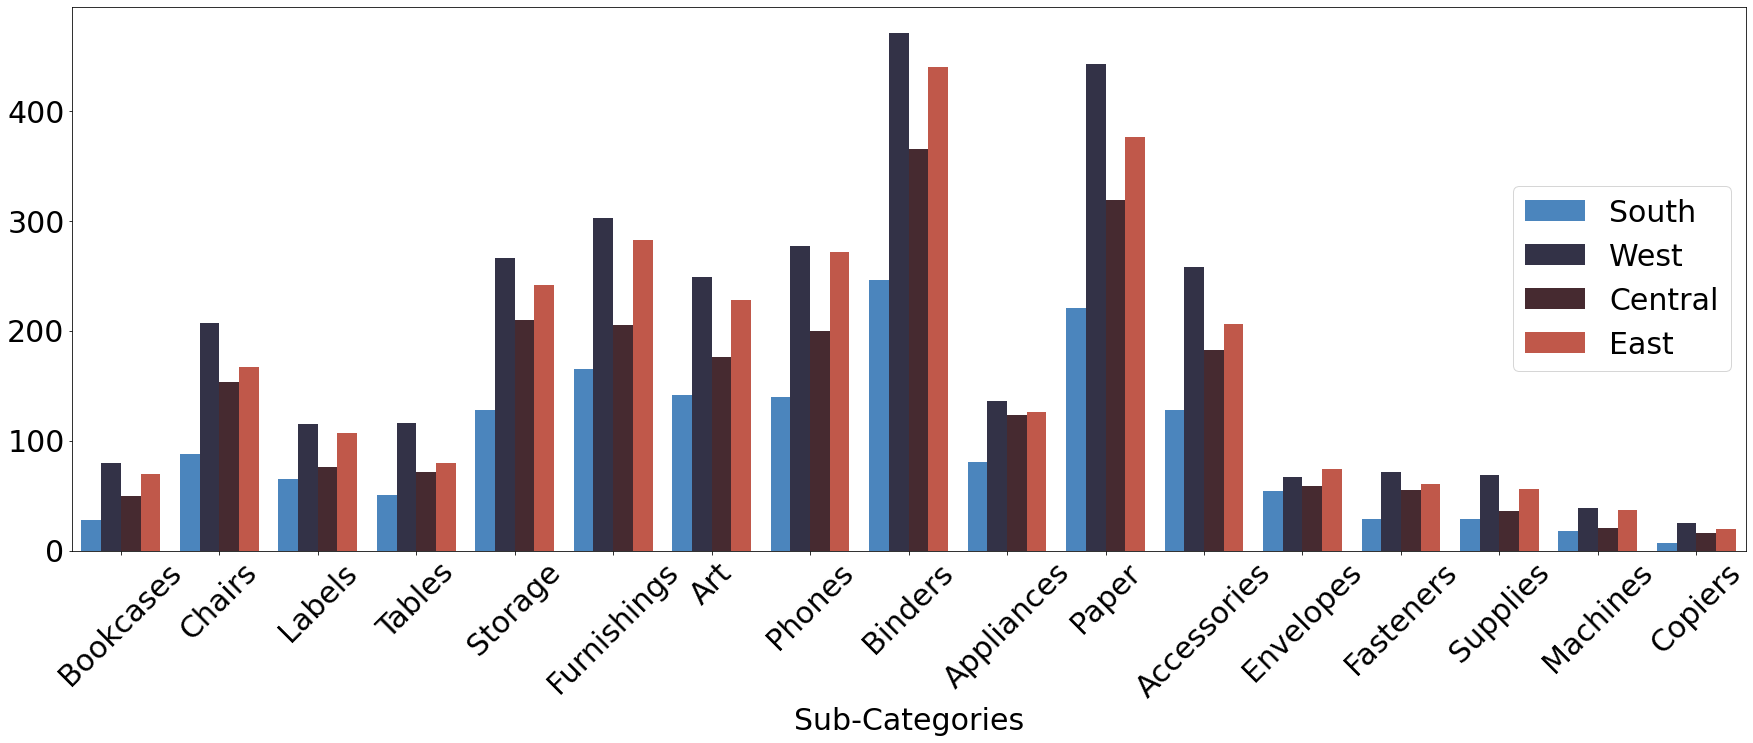

In [68]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = dataset, palette = 'icefire')
plt.xticks(rotation = 45, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Sub-Categories', fontsize = 30) 
plt.ylabel('', fontsize = 30)
plt.legend(loc = 5, fontsize = 30)

# From the above graph, we can see observe the following:

# 1. The top sub-categories according to region are Blinders, Paper, Furnishings. 

# 2. We also observe that the West region has higher count on an average.

Text(0, 0.5, 'Frequency')

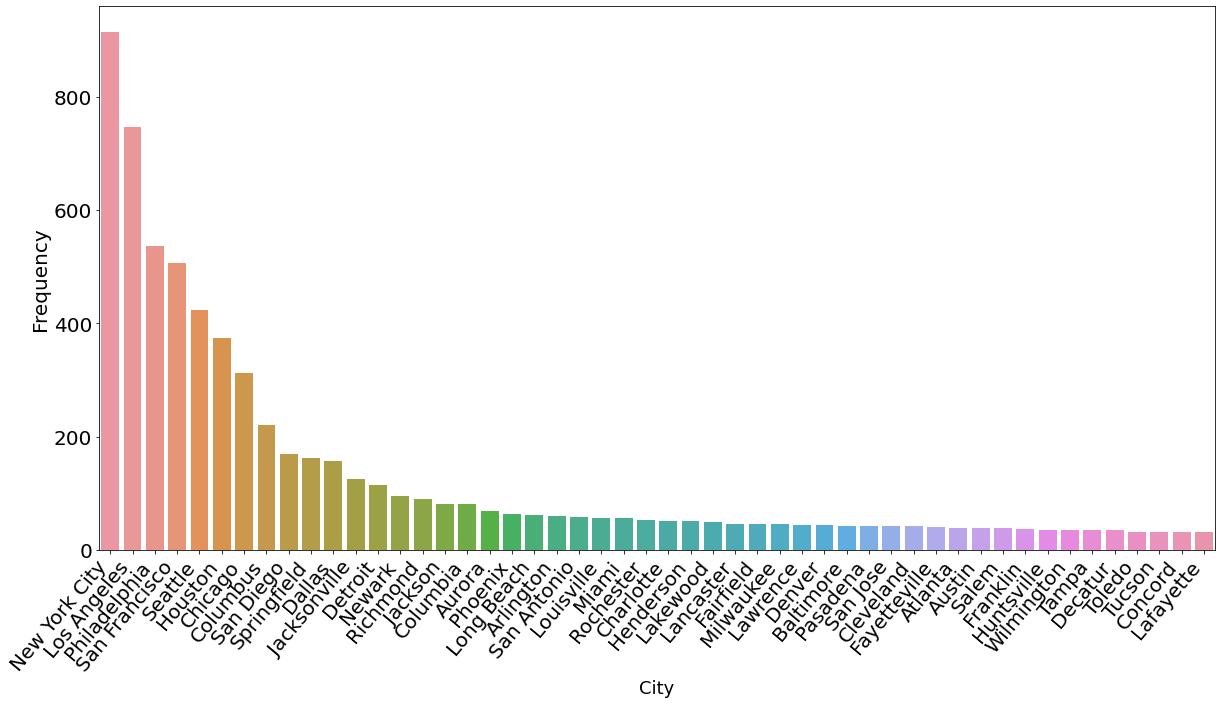

In [69]:
plt.figure(figsize = (20,10))
sns.countplot(x = dataset['City'], order = (dataset['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('City', fontsize = 18)
plt.ylabel('Frequency', fontsize = 20)

# From the above graph, we can observe that New York City, Los Angeles, Philadelphia have topped sales clearly

Text(-2.70000000000001, 0.5, 'Quantities ordered')

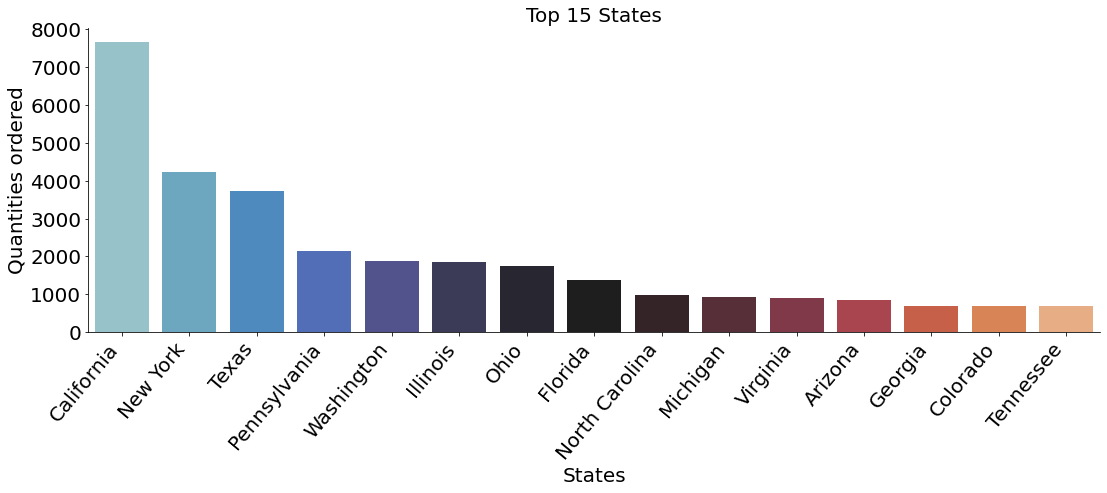

In [70]:
# To be more precise, we can get top 15 states for the above graph as shown below
top_15 = dataset.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_15.head(15), kind = 'bar', palette = 'icefire', aspect = 3)
plt.title('Top 15 States', fontsize = 20)
plt.xticks(rotation = 50, ha = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Quantities ordered', fontsize = 20)

# The top selling states from the above graph are California, New York and Texas

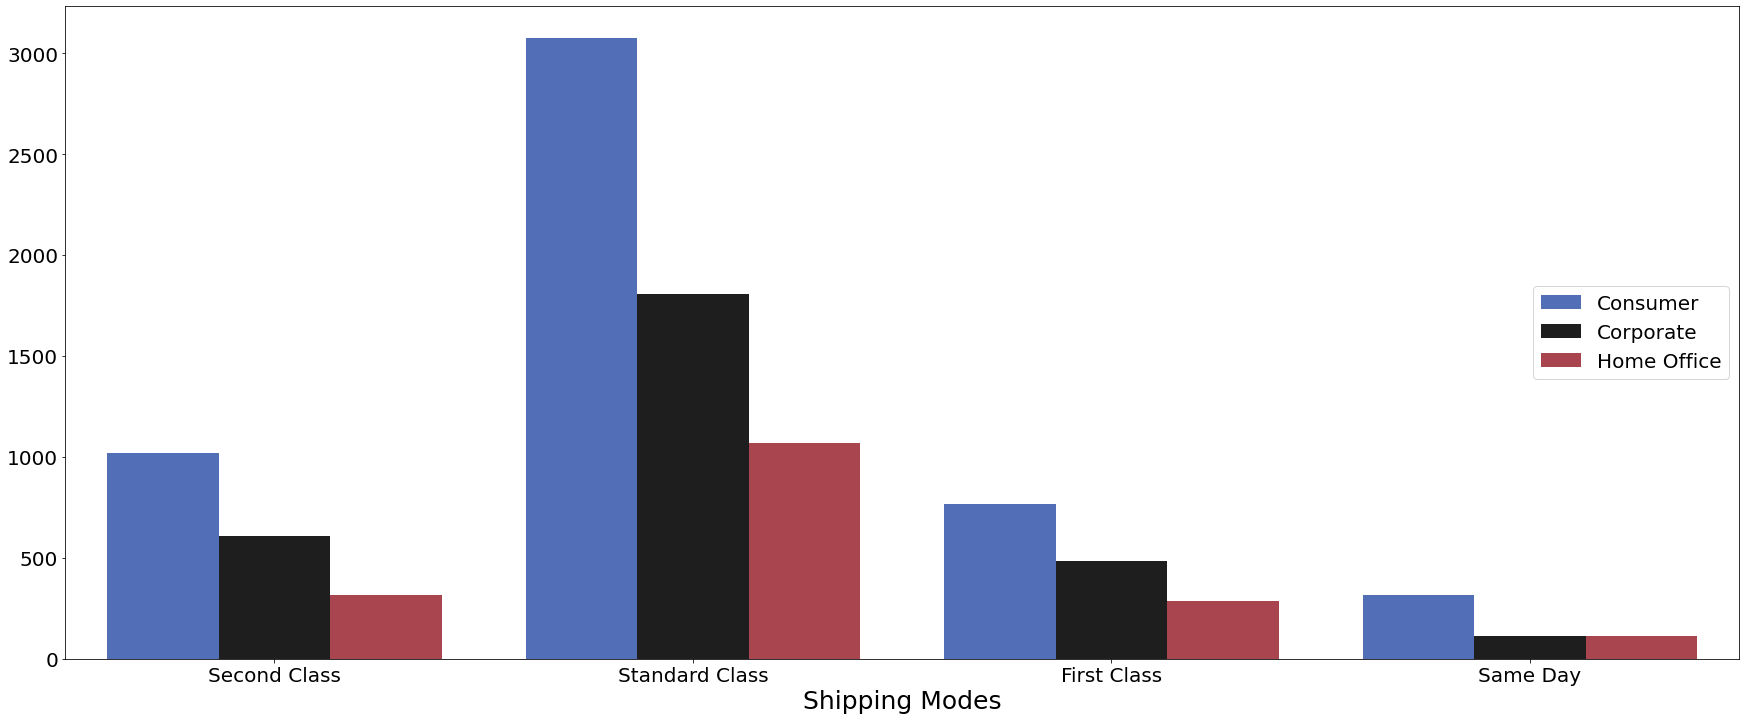

In [72]:
# We can also combine the graph regarding shipping modes and segments
plt.figure(figsize = (30,12))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = dataset, palette = 'icefire')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping Modes', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

# From the above graph, we observe that the people prefer the standard class shipping mode and the items are mostly ordered by the consumer segment.

# Pie Charts are also a strong way of visualizing data. Let us try them now.

Text(0.5, 1.0, 'Ordered quantities')

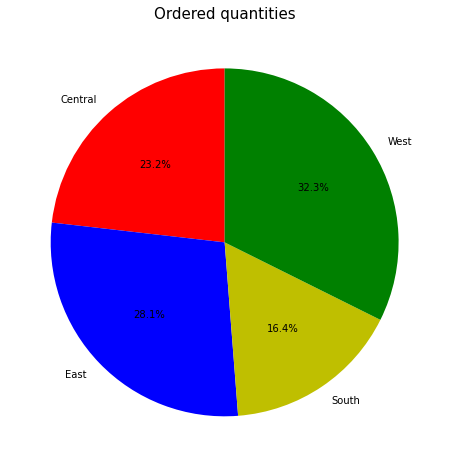

In [73]:
dataset_region = dataset.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (12,8))
plt.pie(dataset_region['Quantity'], labels = dataset_region['Region'].unique(), autopct='%1.1f%%', startangle=90,
        colors = ['r', 'b', 'y', 'g'])
plt.title('Ordered quantities', fontsize = 15)

# From the above pie chart, we see that most of the quantites are from West Region, with East Region tailing slightly behind it.

Text(0.5, 1.0, 'Avg profit divided between different regions')

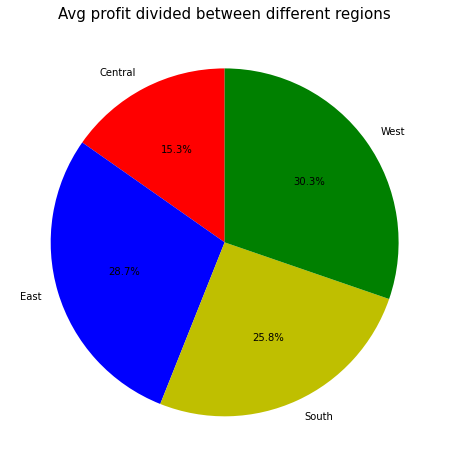

In [74]:
dataset_region = dataset.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (12,8))
plt.pie(dataset_region['Profit'], labels = dataset_region['Region'].unique(), autopct= '%.1f%%', startangle=90,
        colors = ['r', 'b', 'y', 'g'])
plt.title('Avg profit divided between different regions', fontsize = 15)

# Most profit is in the west region

Text(0.5, 1.0, 'Products sold according to category')

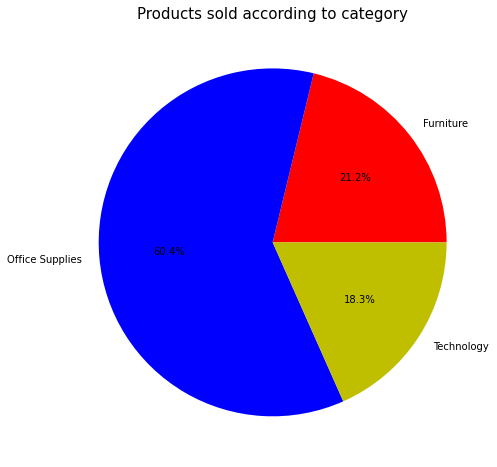

In [75]:
# Most Selling Categories
dataset_cat = dataset.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize = (12,8))
plt.pie(x = dataset_cat['Quantity'], labels = dataset_cat['Category'].unique(), autopct='%1.1f%%',
        colors = ['r', 'b', 'y'])
plt.title('Products sold according to category', fontsize = 15)

# Most sales are in the Office Supplies category

([<matplotlib.patches.Wedge at 0x7f82c8276c10>,
 [Text(0.976073756684635, 0.5072277806977297, 'Binders'),
  Text(0.2016538437473977, 1.081358278879808, 'Paper'),
  Text(-0.5698750957020162, 0.9408731983102814, 'Furnishings'),
  Text(-0.9927555531357746, 0.4737472023327234, 'Phones'),
  Text(-1.0943856106501602, -0.1109961044445972, 'Storage'),
  Text(-0.8966693479300548, -0.6371688006193416, 'Art'),
  Text(-0.4869899755703049, -0.9863269050847361, 'Accessories'),
  Text(-0.023032083622319597, -1.0997588477134497, 'Chairs'),
  Text(0.3454481080284471, -1.044349369061698, 'Appliances'),
  Text(0.6032749708252737, -0.9198148235246948, 'Labels'),
  Text(0.7854334460362346, -0.7701261596956992, 'Tables'),
  Text(0.9108832734856797, -0.6166779241095085, 'Envelopes'),
  Text(0.9936488204365672, -0.47187076794925403, 'Bookcases'),
  Text(1.0498137341525071, -0.32846784254287287, 'Fasteners'),
  Text(1.0831847727456425, -0.19160049084480674, 'Supplies'),
  Text(1.0965661256424153, -0.0868489038

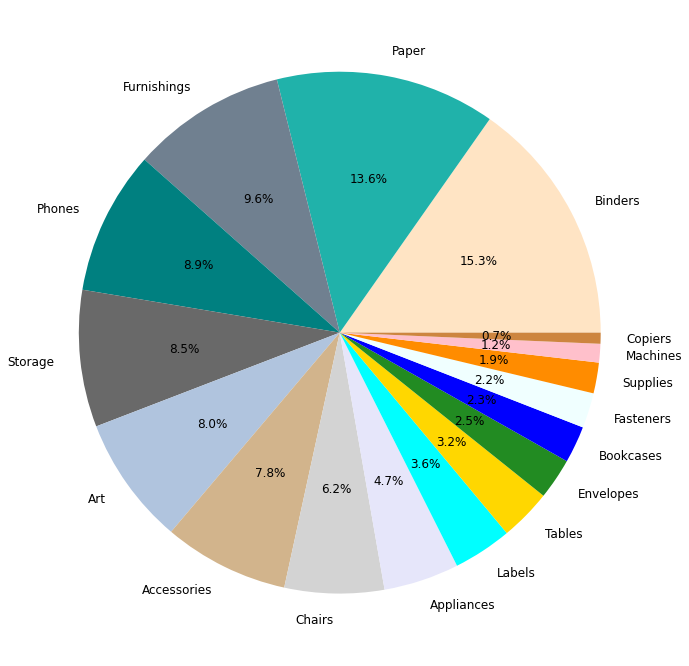

In [76]:
plt.figure(figsize = (13,12))
plt.pie(x = dataset['Sub-Category'].value_counts(), labels = dataset['Sub-Category'].value_counts().index,
        colors = ['bisque', 'lightseagreen', 'slategrey', 'teal', 'dimgray', 'lightsteelblue', 'tan', 'lightgrey', 'lavender',
                  'cyan', 'gold', 'forestgreen', 'blue', 'azure', 'darkorange', 'pink', 'peru'], autopct = '%1.1f%%',
        textprops = {'fontsize' : 12})

# From the above pie chart, we can see the various sub-categories ordered by their percentages of quantites. 

Colours make the chart very lucid

# Conclusion - From the above observations and visualizations from the given data set, the business owner understands the weak areas where he can work to gain more profits.

## Some of the weak areas which can be improved on are -¶
1. The quantity of Copiers should be increased, since it is the most profitable sub-category

2. The least shipped area is the south region, it can be improved using marketing strategies like advertisements, benefits , discounts to attract customer attention and increase sales in that region.

3. Furniture and Technology categories can also benefit from the same strategy.

4. Since most of the shipping modes preferred are of Standard Class and the least preferred are Same Day & First Class modes, we can add more benefits in these categories like cashbacks, discounts, etc. so that people can prefer these least used shipping modes.

# Application of these strategies could increase profit